In [14]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#pip install textblob

In [15]:
# Load the DataFrame (replace with your actual data loading step)
df = pd.read_csv('./issues_sharing_visualize_output_with_patterns.csv')
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,UpdatedAt,State,CSharing_URL,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Detected Patterns
0,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,OPEN,https://chat.openai.com/share/7958273c-0081-48...,200,"July 6, 2023",ハンバーガーメニュー表示の修正,11,2637,4712,あなたはwebデザイナーです。ハンバーガーメニューを実装したところ、初めからメニューの内容が...,ハンバーガーメニューが初めから表示されており、表示非表示を切り替えることができない理由は、c...,"Question Pattern, Output Automator Pattern, Qu..."
1,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,OPEN,https://chat.openai.com/share/7958273c-0081-48...,200,"July 6, 2023",ハンバーガーメニュー表示の修正,11,2637,4712,「ハンバーガーメニュー」とはなんですか。,ハンバーガーメニュー（Hamburger menu）は、ウェブデザインやユーザーインターフェ...,"Question Pattern, Output Automator Pattern, Qu..."
2,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,OPEN,https://chat.openai.com/share/7958273c-0081-48...,200,"July 6, 2023",ハンバーガーメニュー表示の修正,11,2637,4712,そうですね。ありがとうございます。\n\n今回は初めから「ハンバーガーメニュー」が表示されて...,申し訳ありません、誤解が生じました。ハンバーガーメニューの問題点について理解しました。メニュ...,"Question Pattern, Output Automator Pattern, Qu..."
3,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,OPEN,https://chat.openai.com/share/7958273c-0081-48...,200,"July 6, 2023",ハンバーガーメニュー表示の修正,11,2637,4712,変更点を解説してください。,修正点を以下で解説します。.containerクラスにdisplay: none;のスタイル...,"Question Pattern, Output Automator Pattern, Qu..."
4,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,OPEN,https://chat.openai.com/share/7958273c-0081-48...,200,"July 6, 2023",ハンバーガーメニュー表示の修正,11,2637,4712,変更を加えましたが、メニューが最初から表示されていて、ハンバーガーアイコンをクリックしても切...,申し訳ありません、再度問題を確認いたしました。修正が不足していたため、以下の修正を加えてくだ...,"Question Pattern, Output Automator Pattern, Qu..."


In [16]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Type                              0
URL                               0
Author                            0
RepoName                          0
RepoLanguage                   1931
Number                            0
Title                             0
Body                            252
UpdatedAt                         0
State                             0
CSharing_URL                      0
CSharing_Status                   0
CSharing_DateOfConversation       0
CSharing_Title                   26
CSharing_NumberOfPrompts          0
CSharing_TokensOfPrompts          0
CSharing_TokensOfAnswers          0
Conversation_Prompt              32
Conversation_Answer               0
Detected Patterns              1940
dtype: int64


In [26]:
# Drop rows with any null values
df = df.dropna()
df.isnull().sum()
df.shape

(10543, 21)

In [19]:
# For numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
#print("Correlation Matrix (Numerical Columns):")
#print(correlation_matrix)

C:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


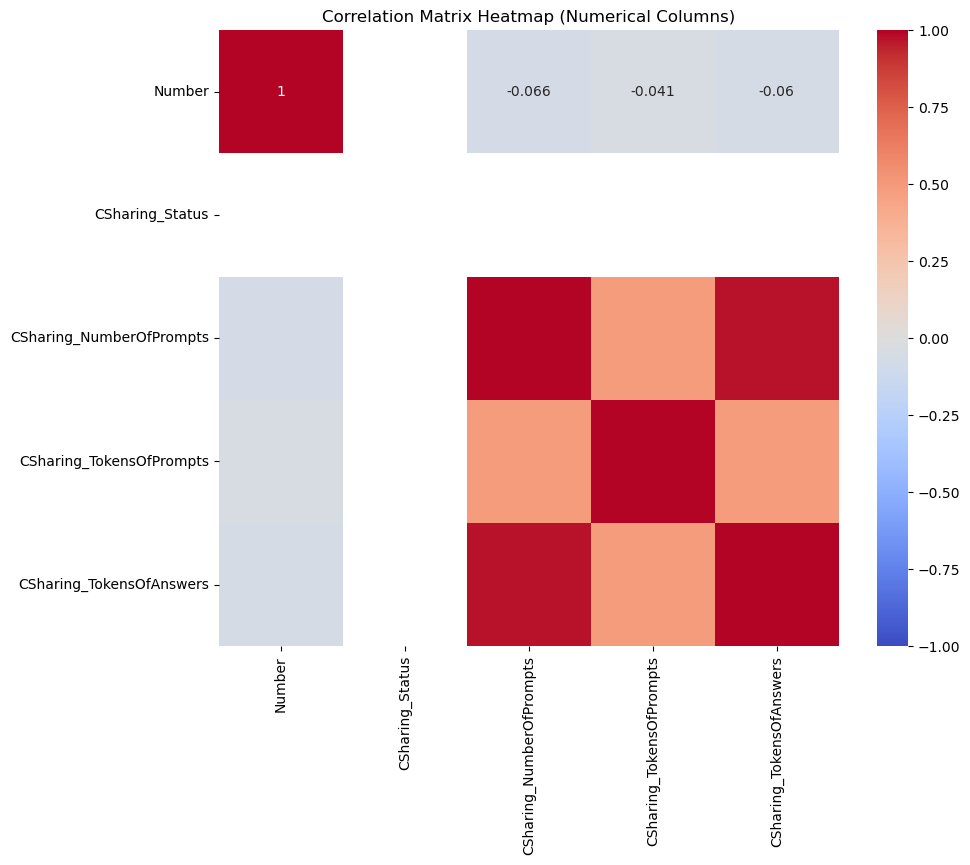

In [6]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Numerical Columns)")
plt.show()

In [20]:
# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Calculate correlation matrix including encoded categorical columns
correlation_matrix_all = df.corr()

C:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


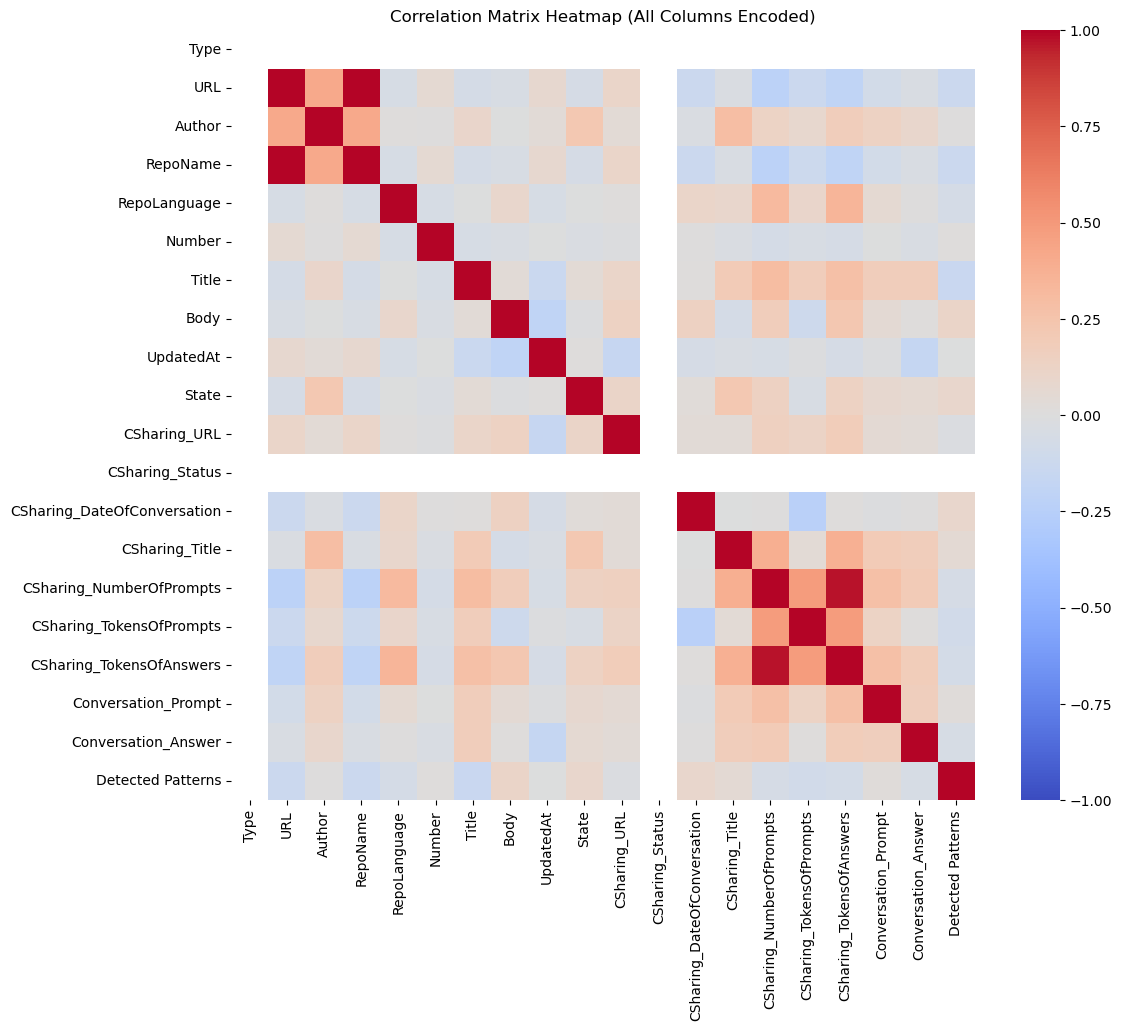

In [8]:
# Visualize the full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (All Columns Encoded)")
plt.show()

In [21]:
# On the basis of above correlation matrix chose columns for calculating the effectiveness of the prompt 
df['Conversation_Answer'] = df['Conversation_Answer'].astype(str)

# Define the effectiveness calculation function
def calculate_effectiveness(row):
    # Calculate response length score
    response_length_score = len(row['Conversation_Answer'].split()) if row['Conversation_Answer'] else 0
    
    # Calculate the prompt-answer token ratio
    prompt_answer_ratio = row['CSharing_TokensOfAnswers'] / (row['CSharing_TokensOfPrompts'] + 1)  # Adding 1 to avoid division by zero
    
    # Sentiment Analysis (if Conversation_Answer is non-empty)
    sentiment_score = TextBlob(row['Conversation_Answer']).sentiment.polarity if row['Conversation_Answer'] else 0

    # Weight these metrics to form a composite effectiveness score
    effectiveness_score = (0.5 * response_length_score + 0.3 * prompt_answer_ratio + 0.2 * sentiment_score)
    return effectiveness_score

# Apply the function to calculate the effectiveness score
df['Effectiveness_Score'] = df.apply(calculate_effectiveness, axis=1)

# Display the DataFrame with the new Effectiveness_Score column
print(df[['Conversation_Prompt', 'Effectiveness_Score']])

       Conversation_Prompt  Effectiveness_Score
0                     1371             1.035861
1                     1370             1.035861
2                     1400             1.035861
3                     1459             1.035861
4                     1457             1.035861
...                    ...                  ...
14556                  316             2.998020
14557                  524             2.998020
14561                  432             1.936786
14562                  111             1.936786
14563                  861             1.936786

[10543 rows x 2 columns]


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


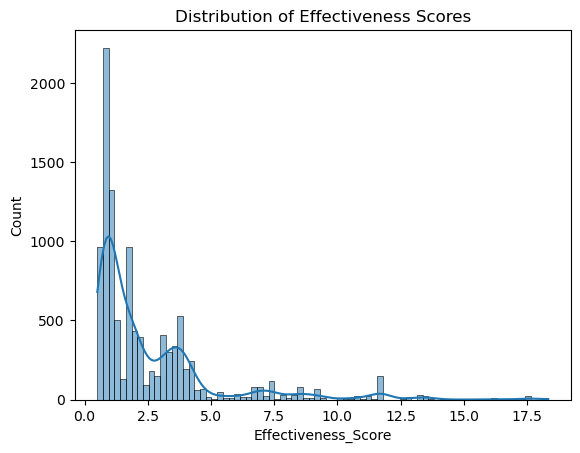

In [22]:
sns.histplot(df['Effectiveness_Score'], kde=True)
plt.title('Distribution of Effectiveness Scores')
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


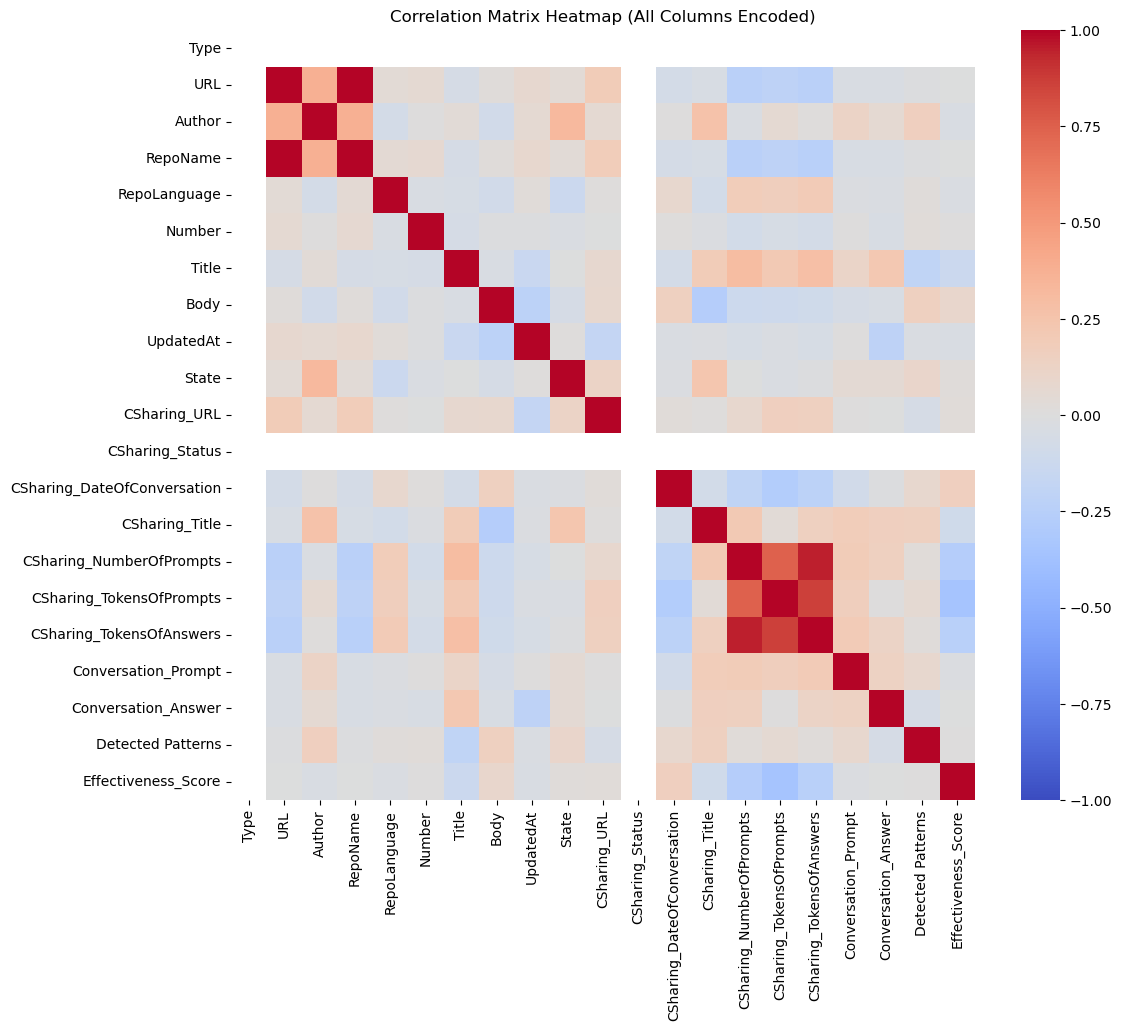

In [23]:
# Calculate correlation matrix including encoded categorical columns
correlation_matrix_all = df.corr()

# Visualize the full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (All Columns Encoded)")
plt.show()

In [24]:
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,UpdatedAt,State,...,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Detected Patterns,Effectiveness_Score
0,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1371,2558,36,1.035861
1,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1370,2559,36,1.035861
2,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1400,2652,36,1.035861
3,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1459,2579,36,1.035861
4,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1457,2645,36,1.035861


In [25]:
# Save the DataFrame to a CSV file
df.to_csv('issues_sharing_output_with_patterns_effectiveness_score.csv', index=False)